In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno


In [144]:
df = pd.read_csv('../data/other/daily_data_30d_prior_to_failure_date.csv')
df.head()

,Failure_Date,Timestamp,Casing_Pressure,Critical_Lift_Rate_Energy,Downhole_Gauge_Pressure,FCV_Gas_Pressure,FCV_Position_Feedback,Gas_Flow_Energy,Gas_Gathering_Pressure,LCV-Position_Feedback,...,Water_Gathering_Pressure,MAX_Pump_Torque,MIN_Pump_Torque,SLOPE_Pump_Torque,SLOPE_Separator_Gas_Pressure,SLOPE_Tubing_Pressure,SLOPE_Tubing_Flow_Meter,SLOPE_Casing_Pressure,STD_Pump_Torque,Well_Number_Encoded
0,2021-09-04,2021-08-10,519.251154,2247.310700,1605.664242,207.535024,-0.633290,0.000000,333.460353,-1.239733,...,85.326842,-3.000347,-3.786212,0.718155,21.847980,23.084061,-0.193505,14.040391,0.277957,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
1,2021-09-04,2021-08-20,550.543252,2302.857324,1633.480695,206.628182,-0.693273,0.000000,338.707580,-1.052798,...,84.072222,-2.805678,-3.671634,0.607622,-3.759161,-2.511932,-0.179843,2.008943,0.297612,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
2,2021-09-04,2021-08-06,367.246717,1953.138215,660.977823,207.274951,99.812378,653.765449,369.090753,-0.159974,...,92.015941,202.213470,191.685333,1.841575,-4.646170,-2.829488,0.080781,-3.484980,2.730292,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
3,2021-09-04,2021-08-15,552.475133,2306.531729,1618.157444,206.942226,-0.662561,0.000000,344.884420,-1.221777,...,84.479813,-2.831119,-3.583106,0.547162,9.971799,10.951504,0.555043,0.551837,0.267764,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
4,2021-09-04,2021-08-27,367.759521,1954.191419,1552.043482,211.315653,99.865758,810.009535,368.714232,0.286427,...,87.084686,186.698853,160.795639,-3.598450,-0.918285,0.309250,-0.336338,0.040397,3.435538,2609100ba79772d1b5525f69752190bf317527de2bbc5c...


In [140]:
df['Failure_Date'] = pd.to_datetime(df['Failure_Date'])
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 

In [141]:
falla1 = df.query('Failure_Date == "2021-09-04"')

In [143]:
falla1.sort_values(by='Timestamp', inplace=True)
falla1

/tmp/ipykernel_3480/3000493625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falla1.sort_values(by='Timestamp', inplace=True)


,Failure_Date,Timestamp,Casing_Pressure,Critical_Lift_Rate_Energy,Downhole_Gauge_Pressure,FCV_Gas_Pressure,FCV_Position_Feedback,Gas_Flow_Energy,Gas_Gathering_Pressure,LCV-Position_Feedback,...,Water_Gathering_Pressure,MAX_Pump_Torque,MIN_Pump_Torque,SLOPE_Pump_Torque,SLOPE_Separator_Gas_Pressure,SLOPE_Tubing_Pressure,SLOPE_Tubing_Flow_Meter,SLOPE_Casing_Pressure,STD_Pump_Torque,Well_Number_Encoded
22,2021-09-04,2021-08-05,368.353688,1955.428104,662.018700,204.661682,99.779010,648.422516,370.582658,-0.345430,...,91.803340,200.193054,193.176529,-0.900104,-0.626766,0.660945,0.098344,0.266932,2.130798,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
34178,2021-09-04,2021-08-05,0.874084,910.483740,0.000000,2.434831,1.065266,0.000000,2.017732,0.151029,...,137.930526,0.000000,0.000000,0.000000,6.561233,0.636296,0.030355,0.711376,0.000000,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
10255,2021-09-04,2021-08-05,377.577521,1974.753759,NaN,210.464676,100.166960,1650.084799,374.223696,4.715555,...,324.558524,489.424927,270.933929,-11.560878,3.207562,4.113447,-0.253793,3.564529,29.108268,e1962830c57d54e978911072caf10f77132b3fe4905fb6...
73166,2021-09-04,2021-08-05,216.735001,1411.031354,NaN,283.524005,36.015823,400.325666,186.787202,-0.985869,...,458.483340,397.265625,211.191559,9.676578,-2.872475,-1.662555,1.528289,3.930108,26.615431,1920be0cb692763287fc22b7ad6bf6548ef9d0e8a37f53...
34195,2021-09-04,2021-08-06,0.538728,911.363018,0.000000,2.505547,1.084530,0.000000,2.683919,0.091343,...,145.854263,0.000000,0.000000,0.000000,6.331664,1.242879,0.041673,1.428409,0.000000,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10261,2021-09-04,2021-09-06,365.141941,1948.455671,NaN,211.738405,100.208530,784.063833,367.157875,-0.516356,...,315.240812,0.000000,0.000000,0.000000,3.403683,-25.789777,0.067568,6.162796,0.000000,e1962830c57d54e978911072caf10f77132b3fe4905fb6...
34170,2021-09-04,2021-09-06,134.869355,1497.730748,3851.305498,2.349482,-0.153811,0.000000,5.339311,0.105725,...,37.040362,0.000000,0.000000,0.000000,-8.193952,1.447731,0.046274,85.798764,0.000000,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
20,2021-09-04,2021-09-06,357.808877,1933.281871,1952.845080,207.893615,99.813207,466.744014,360.252593,-1.007439,...,85.939893,-3.089204,-3.829777,0.498567,1.083699,-0.993123,-0.111990,1.643603,0.258692,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
73178,2021-09-04,2021-09-06,222.888819,1424.587376,NaN,287.578441,36.014056,406.067778,190.326069,-0.678920,...,459.268393,384.143005,227.287201,-4.269341,7.552849,8.340592,-1.502718,3.556705,29.067150,1920be0cb692763287fc22b7ad6bf6548ef9d0e8a37f53...


In [147]:
falla1[['Timestamp']].value_counts()

falla1.query('Timestamp == "2021-09-04 00:00:00"')

,Failure_Date,Timestamp,Casing_Pressure,Critical_Lift_Rate_Energy,Downhole_Gauge_Pressure,FCV_Gas_Pressure,FCV_Position_Feedback,Gas_Flow_Energy,Gas_Gathering_Pressure,LCV-Position_Feedback,...,Water_Gathering_Pressure,MAX_Pump_Torque,MIN_Pump_Torque,SLOPE_Pump_Torque,SLOPE_Separator_Gas_Pressure,SLOPE_Tubing_Pressure,SLOPE_Tubing_Flow_Meter,SLOPE_Casing_Pressure,STD_Pump_Torque,Well_Number_Encoded
34198,2021-09-04,2021-09-04,756.198105,2455.462366,3662.576359,13.750833,3.552139,29.471790,189.547918,0.117701,...,122.954527,417.748596,0.000000,-2.568653,-134.297883,247.266227,0.037045,-2648.361307,24.616072,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
10271,2021-09-04,2021-09-04,369.585588,1958.029507,NaN,209.960221,100.226477,1130.366003,368.876552,1.566222,...,320.168511,501.862488,0.000000,-356.566418,-21.953761,-32.977821,-17.138233,-23.802164,152.285796,e1962830c57d54e978911072caf10f77132b3fe4905fb6...
16,2021-09-04,2021-09-04,359.776758,1937.724421,1236.197508,207.188979,99.974137,738.700652,360.678851,0.449202,...,88.649518,635.699341,-3.327017,-258.418891,0.769522,-8.999375,-12.135342,1.324700,118.840610,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
73151,2021-09-04,2021-09-04,224.818525,1428.797311,NaN,279.623794,35.966053,404.367306,192.294257,-0.733893,...,458.009479,371.635590,0.000000,47.286567,9.173449,49.353030,0.453861,2.240241,94.418623,1920be0cb692763287fc22b7ad6bf6548ef9d0e8a37f53...


<AxesSubplot: >

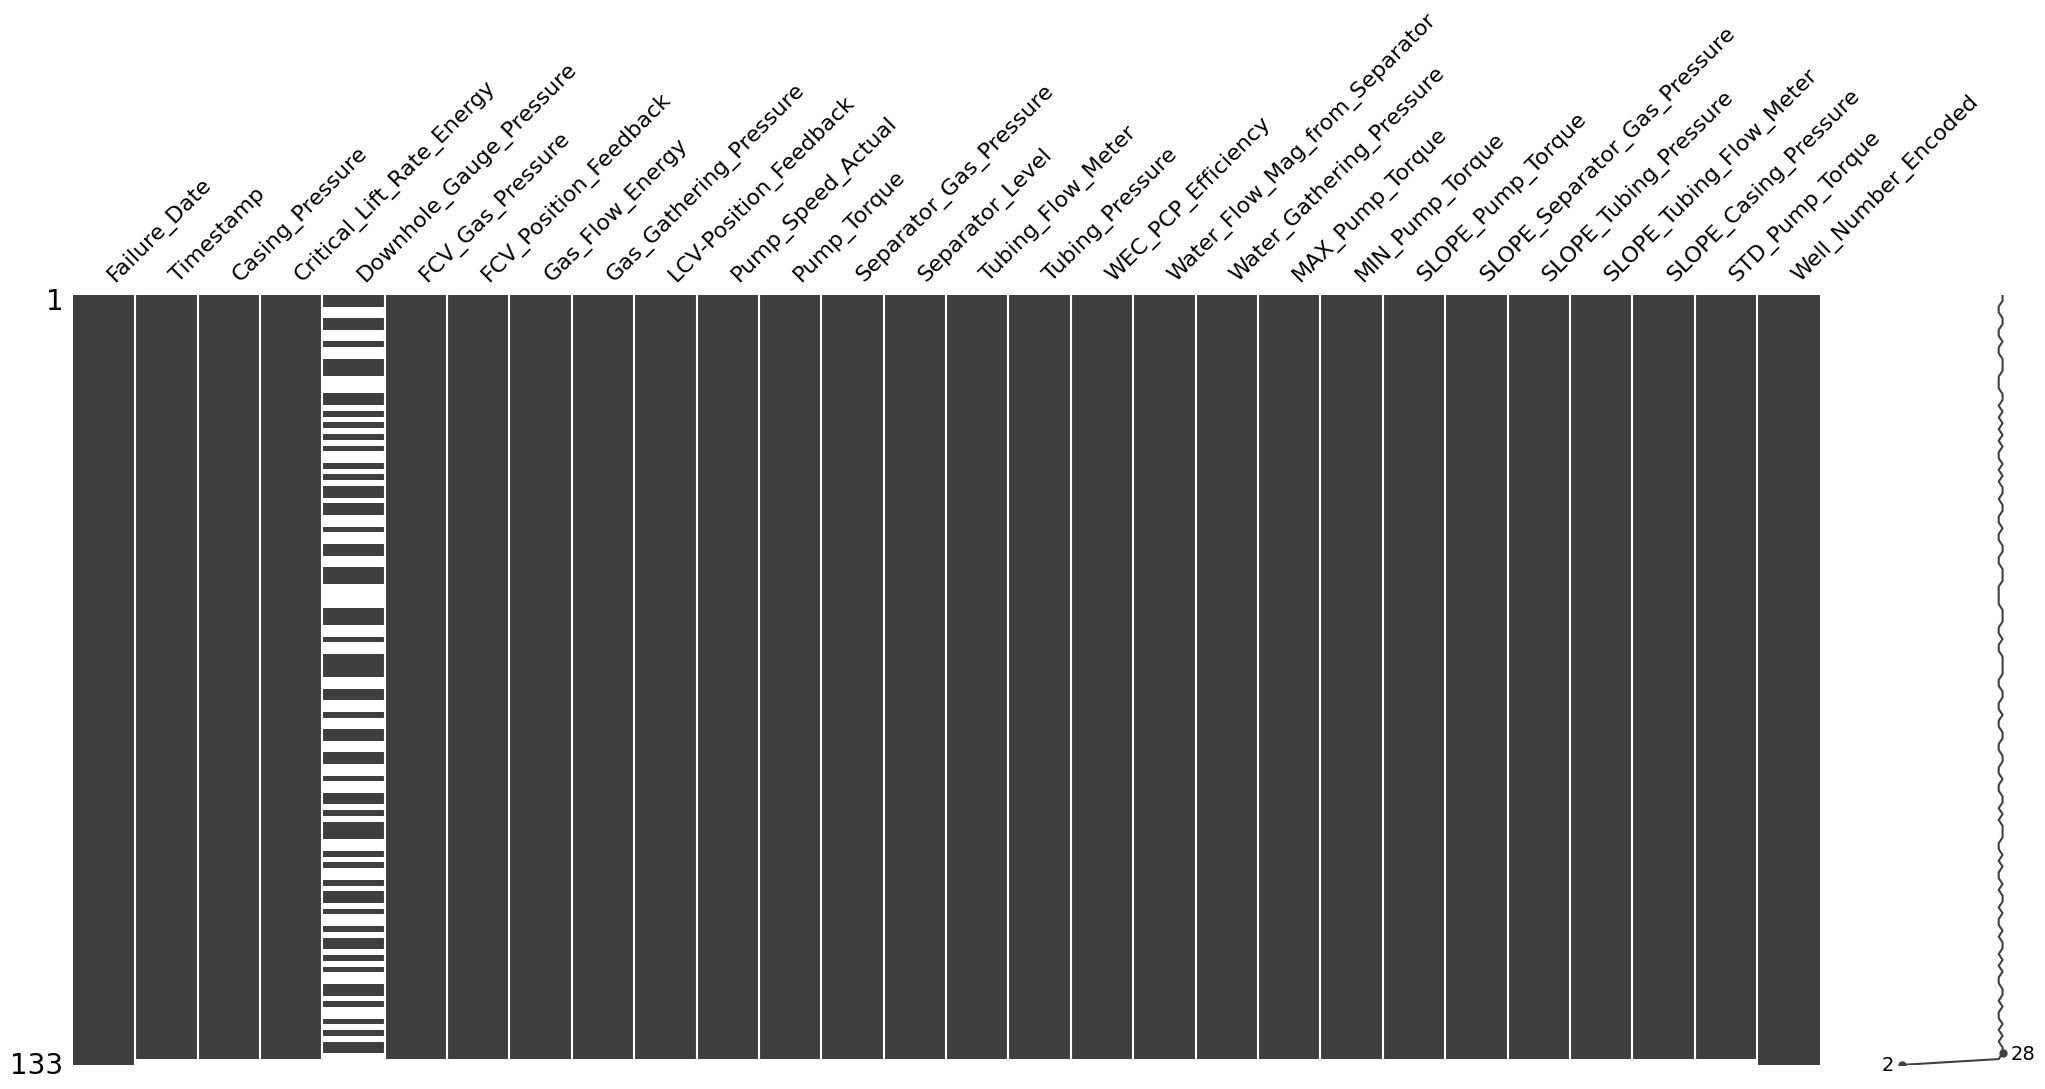

In [81]:
# use missio to plot missing values
msno.matrix(falla1)

In [82]:
falla1.isna().sum()

Failure_Date                      0
Timestamp                         1
Casing_Pressure                   1
Critical_Lift_Rate_Energy         1
Downhole_Gauge_Pressure          67
FCV_Gas_Pressure                  1
FCV_Position_Feedback             1
Gas_Flow_Energy                   1
Gas_Gathering_Pressure            1
LCV-Position_Feedback             1
Pump_Speed_Actual                 1
Pump_Torque                       1
Separator_Gas_Pressure            1
Separator_Level                   1
Tubing_Flow_Meter                 1
Tubing_Pressure                   1
WEC_PCP_Efficiency                1
Water_Flow_Mag_from_Separator     1
Water_Gathering_Pressure          1
MAX_Pump_Torque                   1
MIN_Pump_Torque                   1
SLOPE_Pump_Torque                 1
SLOPE_Separator_Gas_Pressure      1
SLOPE_Tubing_Pressure             1
SLOPE_Tubing_Flow_Meter           1
SLOPE_Casing_Pressure             1
STD_Pump_Torque                   1
Well_Number_Encoded         

In [87]:
falla1= falla1.drop(['Downhole_Gauge_Pressure'],axis=1)
falla1= falla1.dropna()

In [88]:
falla1.isna().sum()

Failure_Date                     0
Timestamp                        0
Casing_Pressure                  0
Critical_Lift_Rate_Energy        0
Downhole_Gauge_Pressure          0
FCV_Gas_Pressure                 0
FCV_Position_Feedback            0
Gas_Flow_Energy                  0
Gas_Gathering_Pressure           0
LCV-Position_Feedback            0
Pump_Speed_Actual                0
Pump_Torque                      0
Separator_Gas_Pressure           0
Separator_Level                  0
Tubing_Flow_Meter                0
Tubing_Pressure                  0
WEC_PCP_Efficiency               0
Water_Flow_Mag_from_Separator    0
Water_Gathering_Pressure         0
MAX_Pump_Torque                  0
MIN_Pump_Torque                  0
SLOPE_Pump_Torque                0
SLOPE_Separator_Gas_Pressure     0
SLOPE_Tubing_Pressure            0
SLOPE_Tubing_Flow_Meter          0
SLOPE_Casing_Pressure            0
STD_Pump_Torque                  0
Well_Number_Encoded              0
dtype: int64

/tmp/ipykernel_3480/1048186885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falla1.sort_values(by='Timestamp', inplace=True)


In [93]:
falla1.columns

variables = ['Casing_Pressure',
       'Critical_Lift_Rate_Energy',
       'FCV_Gas_Pressure', 'FCV_Position_Feedback', 'Gas_Flow_Energy',
       'Gas_Gathering_Pressure', 'LCV-Position_Feedback', 'Pump_Speed_Actual',
       'Pump_Torque', 'Separator_Gas_Pressure', 'Separator_Level',
       'Tubing_Flow_Meter', 'Tubing_Pressure', 'WEC_PCP_Efficiency',
       'Water_Flow_Mag_from_Separator', 'Water_Gathering_Pressure',
       'MAX_Pump_Torque', 'MIN_Pump_Torque', 'SLOPE_Pump_Torque',
       'SLOPE_Separator_Gas_Pressure', 'SLOPE_Tubing_Pressure',
       'SLOPE_Tubing_Flow_Meter', 'SLOPE_Casing_Pressure', 'STD_Pump_Torque']

# Alternativa 1 

In [95]:
medidas_tendencia_central =  dict((k,dict()) for k in   variables   ) 

for variable in variables:
    medidas_tendencia_central[variable]['media'] = falla1[variable].mean()
    medidas_tendencia_central[variable]['mediana'] = falla1[variable].median()
    medidas_tendencia_central[variable]['moda'] = falla1[variable].mode()[0]
    medidas_tendencia_central[variable]['varianza'] = falla1[variable].var()
    medidas_tendencia_central[variable]['desviacion_estandar'] = falla1[variable].std()
    medidas_tendencia_central[variable]['rango'] = falla1[variable].max() - falla1[variable].min()
    medidas_tendencia_central[variable]['coeficiente_variacion'] = medidas_tendencia_central[variable]['desviacion_estandar'] / medidas_tendencia_central[variable]['media']
    medidas_tendencia_central[variable]['skewness'] = falla1[variable].skew()
    medidas_tendencia_central[variable]['kurtosis'] = falla1[variable].kurtosis()
    medidas_tendencia_central[variable]['percentil_25'] = falla1[variable].quantile(0.25)
    medidas_tendencia_central[variable]['percentil_75'] = falla1[variable].quantile(0.75)
    medidas_tendencia_central[variable]['rango_intercuartil'] = medidas_tendencia_central[variable]['percentil_75'] - medidas_tendencia_central[variable]['percentil_25']

medidas_tendencia_central


{'Casing_Pressure': {'media': 489.69465427540325,
  'mediana': 366.9358254008823,
  'moda': 0.5387280427874228,
  'varianza': 189984.43193627492,
  'desviacion_estandar': 435.8720361944259,
  'rango': 2434.150424144984,
  'coeficiente_variacion': 0.8900894310136626,
  'skewness': 3.0052063181507767,
  'kurtosis': 10.852097436174308,
  'percentil_25': 259.7957639561759,
  'percentil_75': 549.413845592075,
  'rango_intercuartil': 289.61808163589905},
 'Critical_Lift_Rate_Energy': {'media': 2134.724096757395,
  'mediana': 1967.339170244005,
  'moda': 910.483740488688,
  'varianza': 442311.9099653726,
  'desviacion_estandar': 665.065342628356,
  'rango': 3986.7528911166723,
  'coeficiente_variacion': 0.31154627599818524,
  'skewness': 2.301054998448472,
  'kurtosis': 8.184422966327855,
  'percentil_25': 1848.1391544342036,
  'percentil_75': 2301.2629917992485,
  'rango_intercuartil': 453.1238373650449},
 'FCV_Gas_Pressure': {'media': 109.965474418631,
  'mediana': 162.24022492518029,
  'mo

## Alternativa 2 

In [96]:
medidas_tendencia_central_df  =  falla1.describe()

In [97]:
medidas_tendencia_central_df#.iloc[1,0]

,Casing_Pressure,Critical_Lift_Rate_Energy,Downhole_Gauge_Pressure,FCV_Gas_Pressure,FCV_Position_Feedback,Gas_Flow_Energy,Gas_Gathering_Pressure,LCV-Position_Feedback,Pump_Speed_Actual,Pump_Torque,...,Water_Flow_Mag_from_Separator,Water_Gathering_Pressure,MAX_Pump_Torque,MIN_Pump_Torque,SLOPE_Pump_Torque,SLOPE_Separator_Gas_Pressure,SLOPE_Tubing_Pressure,SLOPE_Tubing_Flow_Meter,SLOPE_Casing_Pressure,STD_Pump_Torque
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,489.694654,2134.724097,2492.171910,109.965474,25.306667,180.432994,267.654514,0.085349,13.978891,51.762693,...,6.236034,127.198444,103.301227,32.519856,-4.016166,6.089033,12.034620,0.389839,-20.339522,13.901709
std,435.872036,665.065343,1370.591293,100.493527,42.231298,297.225071,98.217871,2.104215,26.953627,91.141437,...,12.028366,49.857879,178.230565,69.913113,77.936745,71.897854,71.590724,4.975245,893.474972,33.844711
min,0.538728,910.483740,0.000000,1.924229,-0.726189,0.000000,2.017732,-1.251745,-1.025715,-3.653384,...,-0.961039,37.040362,-3.233552,-4.088649,-358.159227,-279.005961,-258.671554,-18.507705,-3243.973668,0.000000
25%,259.795764,1848.139154,1605.870816,3.047255,-0.173534,0.000000,206.409290,-1.008577,-0.894804,-3.220229,...,0.034074,84.947396,-2.674409,-3.651160,0.000000,-1.265144,-1.884145,-0.099654,0.376569,0.000000
50%,366.935825,1967.339170,1689.447425,162.240225,0.845243,27.240425,283.411942,0.042650,0.000000,0.000000,...,0.265737,91.897981,0.000000,0.000000,0.000000,1.079088,1.854103,0.036801,2.073397,0.270773
75%,549.413846,2301.262992,4083.691785,207.269098,51.408224,150.765396,351.982152,0.157565,25.334688,130.309976,...,2.048217,177.532715,197.818462,0.000000,0.650278,9.243301,10.920718,0.238412,13.282233,4.953309
max,2434.689152,4897.236632,4497.809475,214.094741,99.974137,848.838354,377.678260,14.451715,104.137672,287.934990,...,35.472683,251.820842,659.319580,193.176529,372.092077,365.471538,285.995099,21.144903,3295.138302,160.262079


In [99]:
medidas_tendencia_central_df.loc['mean', 'Casing_Pressure']

489.69465427540325

In [100]:
## Outliers 

In [102]:
falla1.head()

,Failure_Date,Timestamp,Casing_Pressure,Critical_Lift_Rate_Energy,Downhole_Gauge_Pressure,FCV_Gas_Pressure,FCV_Position_Feedback,Gas_Flow_Energy,Gas_Gathering_Pressure,LCV-Position_Feedback,...,Water_Gathering_Pressure,MAX_Pump_Torque,MIN_Pump_Torque,SLOPE_Pump_Torque,SLOPE_Separator_Gas_Pressure,SLOPE_Tubing_Pressure,SLOPE_Tubing_Flow_Meter,SLOPE_Casing_Pressure,STD_Pump_Torque,Well_Number_Encoded
22,2021-09-04,2021-08-05,368.353688,1955.428104,662.018700,204.661682,99.779010,648.422516,370.582658,-0.345430,...,91.803340,200.193054,193.176529,-0.900104,-0.626766,0.660945,0.098344,0.266932,2.130798,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
34178,2021-09-04,2021-08-05,0.874084,910.483740,0.000000,2.434831,1.065266,0.000000,2.017732,0.151029,...,137.930526,0.000000,0.000000,0.000000,6.561233,0.636296,0.030355,0.711376,0.000000,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
34195,2021-09-04,2021-08-06,0.538728,911.363018,0.000000,2.505547,1.084530,0.000000,2.683919,0.091343,...,145.854263,0.000000,0.000000,0.000000,6.331664,1.242879,0.041673,1.428409,0.000000,521b5de45293c41d54b1eadf109837081e363eb1b20f5b...
2,2021-09-04,2021-08-06,367.246717,1953.138215,660.977823,207.274951,99.812378,653.765449,369.090753,-0.159974,...,92.015941,202.213470,191.685333,1.841575,-4.646170,-2.829488,0.080781,-3.484980,2.730292,2609100ba79772d1b5525f69752190bf317527de2bbc5c...
25,2021-09-04,2021-08-07,374.028066,1967.195544,666.982721,207.043757,99.832298,619.664617,375.716640,-0.362555,...,91.992622,225.884689,170.530746,-1.006779,28.928481,29.242392,-2.563420,29.389059,6.827132,2609100ba79772d1b5525f69752190bf317527de2bbc5c...


In [106]:
medidas_tendencia_central

outliers = dict((k,0) for k in   variables   )
outliers

medidas_tendencia_central['Casing_Pressure'].keys()


for variable in variables:
    for i in falla1[variable]:
        if i < medidas_tendencia_central[variable]['percentil_25'] - 1.5 * medidas_tendencia_central[variable]['rango_intercuartil'] or i > medidas_tendencia_central[variable]['percentil_75'] + 1.5 * medidas_tendencia_central[variable]['rango_intercuartil']:
            outliers[variable] += 1

       

In [107]:
outliers

{'Casing_Pressure': 5,
 'Critical_Lift_Rate_Energy': 7,
 'FCV_Gas_Pressure': 0,
 'FCV_Position_Feedback': 0,
 'Gas_Flow_Energy': 15,
 'Gas_Gathering_Pressure': 0,
 'LCV-Position_Feedback': 2,
 'Pump_Speed_Actual': 4,
 'Pump_Torque': 0,
 'Separator_Gas_Pressure': 0,
 'Separator_Level': 0,
 'Tubing_Flow_Meter': 11,
 'Tubing_Pressure': 0,
 'WEC_PCP_Efficiency': 0,
 'Water_Flow_Mag_from_Separator': 14,
 'Water_Gathering_Pressure': 0,
 'MAX_Pump_Torque': 3,
 'MIN_Pump_Torque': 13,
 'SLOPE_Pump_Torque': 19,
 'SLOPE_Separator_Gas_Pressure': 14,
 'SLOPE_Tubing_Pressure': 10,
 'SLOPE_Tubing_Flow_Meter': 20,
 'SLOPE_Casing_Pressure': 18,
 'STD_Pump_Torque': 13}

<AxesSubplot: xlabel='Timestamp', ylabel='SLOPE_Pump_Torque'>

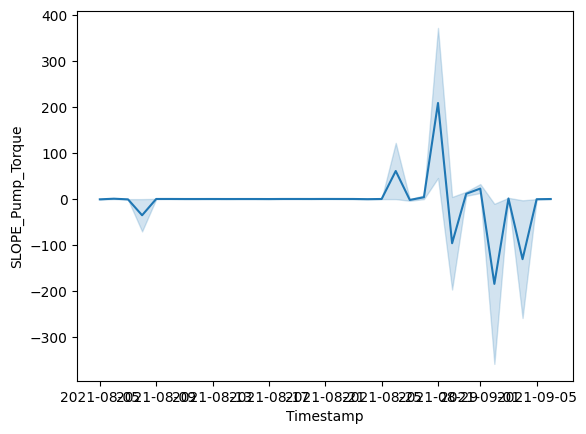

In [110]:
## make a scatter plot of one variable vs Timestamp
target = 'SLOPE_Pump_Torque'
# line plot 
sns.lineplot(data=falla1, x='Timestamp', y=target)


In [115]:
medidas_tendencia_central[variable]

{'media': 13.901708556446485,
 'mediana': 0.2707728774417184,
 'moda': 0.0,
 'varianza': 1145.4644917897288,
 'desviacion_estandar': 33.84471143014413,
 'rango': 160.2620794870841,
 'coeficiente_variacion': 2.4345720738369026,
 'skewness': 2.971243543320462,
 'kurtosis': 8.568313777869477,
 'percentil_25': 0.0,
 'percentil_75': 4.953309271237312,
 'rango_intercuartil': 4.953309271237312}

In [130]:
falla1[target].max()

214.09474097357847

In [ ]:
## make a scatter plot of one variable vs Timestamp
target = 'MAX_Pump_Torque'
# line plot 
sns.scatterplot(data=falla1, x='Timestamp', y=target)
# add a horizontal line at the mean 
plt.axhline(medidas_tendencia_central[target]['percentil_25'] , color='red', linestyle='--')
plt.axhline(medidas_tendencia_central[target]['percentil_75'] , color='red', linestyle='--')

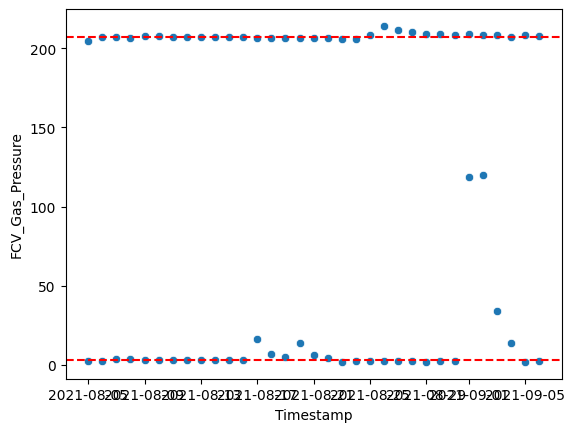

In [129]:
## make a scatter plot of one variable vs Timestamp
target = 'FCV_Gas_Pressure'
# line plot 
sns.scatterplot(data=falla1, x='Timestamp', y=target)
# add a horizontal line at the mean 
plt.axhline(medidas_tendencia_central[target]['percentil_25'] , color='red', linestyle='--')
plt.axhline(medidas_tendencia_central[target]['percentil_75'] , color='red', linestyle='--')

<AxesSubplot: xlabel='Timestamp', ylabel='Critical_Lift_Rate_Energy'>

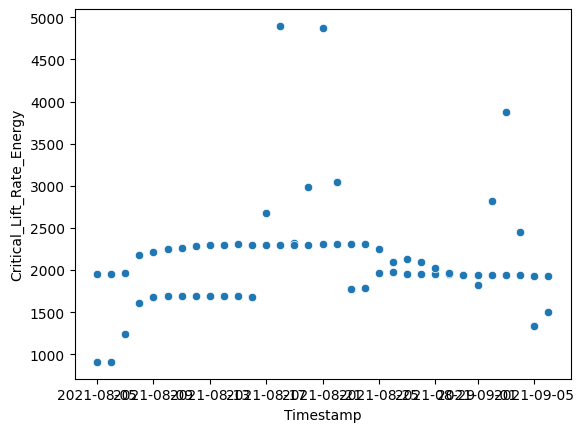

In [134]:
sns.scatterplot(data=falla1, x='Timestamp', y=target)

<AxesSubplot: xlabel='Timestamp', ylabel='Critical_Lift_Rate_Energy'>

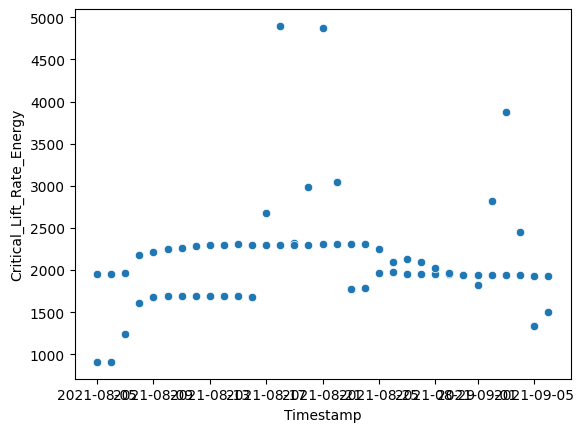

In [132]:
## make a scatter plot of one variable vs Timestamp
target = 'Critical_Lift_Rate_Energy'
# line plot 
sns.scatterplot(data=falla1, x='Timestamp', y=target)